![title](logo1.jpg)

# Aerofit Case Study

## About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of peteristics.

## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

- Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
- 
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in $)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week

## Product Portfolio:

- The KP281 is an entry level treadmill that sells for \$1,500
- The KP481 is for mid level runners that sell for \$1,750
- The The KP781 treadmill is having advanced features that sell for \$2,500


## 1. Defining Problem Statement and Analysing basic metrics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import binom, norm

In [8]:
#Read the dataframe
aerofit_df = pd.read_csv("aerofit_treadmill.txt", sep=",")
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [9]:
#Shape of the dataframe
aerofit_df.shape

(180, 9)

In [7]:
#Drop the duplicates
aerofit_df.drop_duplicates(inplace=True)
aerofit_df.shape

(180, 9)

The dataframe does not contain any duplicate values

In [10]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [12]:
aerofit_df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

The dataframe does not have any missing values!

In [11]:
aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- The average age of the users is 28.79 years with a stardard deviation of 6.94 years. The minimum and maximum age of the users are 18 and 50 years respectively. The median age is 26 years and the value is very close to mean.
- The average years of education of the users are 15.57 years with a standard deviation of 1.62 years. The minimum and maximum years of education of the users are 12 and 21 years respectively. The median years of education is 16 years and the value is very close to mean. 
- The average number of times the user plans to use treadmill in a week is 3.46 times with a standard deviation of 1.08 times. The minimum and maximum time that the user plans to the treadmill in a week are 2 times and 7 times respectively. The median treadmill usage is 3 times a week and the value is very close to mean. 
- The average self-rated fitness of the users on a 1-5 scale is 3.31 with a standard deviation of 0.96. The minimum and maximum self-rated fitness levels of the users are 1 and 5 respectively. The median self-rated fitness of users is 3 and the value is very close to mean. 
- The average annual income of the users is 53,719.58 dollars with a standard deviation of 16,506.68 dollars. The minimum and maximum income of the users range between 29,562 and 104,581 dollars. The median annual income of users is 50,596.5 dollars and the value is very close to mean. 
- The average number of miles that the user plans to walk/run in a week is 103.19 miles with a standard deviation of 51.86 miles. The minimum and maximum number of miles are 21 and 360 miles per week respectively. The median number of miles is 94 miles and is somewhat close to mean value.

All the median values of different columns are close to the mean values. This shows that there are no significant outliers present in the data for any of the features/columns.

## 2. Non-Graphical Analysis

For Non-graphical analysis, only value counts operation is performed as it gives the unique values in the dataset along with the count of it.

In [16]:
#Value count of Product
aerofit_df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [32]:
#Percentage of Products
aerofit_df["Product"].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

It can be noticed that the entry level treadmill "KP281" has the highest sales at around 44.44% followed by mid level runners "KP481" at 33.33%. The high end treadmill with advanced feature "KP781" has the least sales of 22.22%

In [18]:
#Value count of Gender
aerofit_df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [64]:
#Percentage of Gender
aerofit_df["Gender"].value_counts(normalize=True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

57.78% of the gender are Male and 42.22% of the gender are Female

In [20]:
#Value count of Education
aerofit_df["Education"].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

Majority of the users have an education of 16,14 and 18 years.

In [21]:
#Value count of MaritalStatus
aerofit_df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [65]:
#Percentage of MaritalStatus
aerofit_df["MaritalStatus"].value_counts(normalize=True)

MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

59.44% of the users have a partner and 40.56% of the users are single.

In [22]:
#Value count of Usage
aerofit_df["Usage"].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [66]:
#Percentage of Usage
aerofit_df["Usage"].value_counts(normalize=True)

Usage
3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: proportion, dtype: float64

38.33% of the users would use the treadmill for 3 times a week. 28.89% of the users would use the treadmill 4 times a week. 18.33% of the users will use the treadmill for 2 times a week. It can be said that 85.55% of the users will use the treadmill atmost 4 times a week.

In [23]:
#Value count of Fitness
aerofit_df["Fitness"].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [67]:
#Percentage of Fitness
aerofit_df["Fitness"].value_counts(normalize=True)

Fitness
3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: proportion, dtype: float64

53.89% of the users have a moderate fitness level of 3 and 17.22% of the users have high fitness levels of 5 on a scale of 1-5. 

## 3. Visual Analysis: Univariate and Bivariate

### For Continuous variable

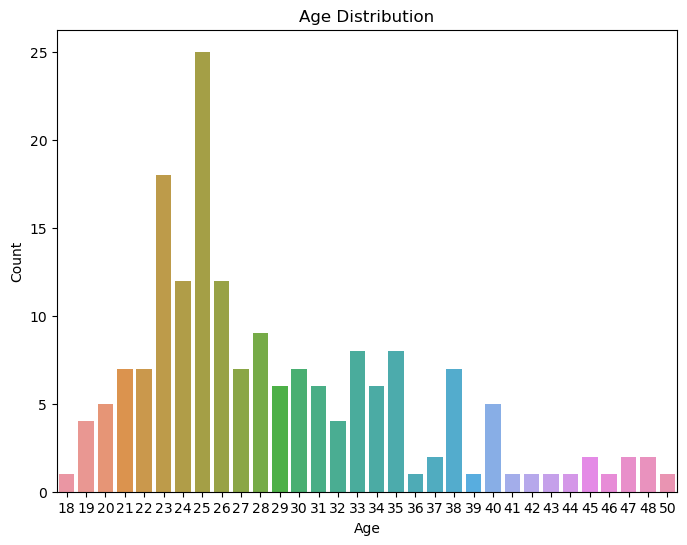

In [91]:
# Get the age counts and reset the index to convert it into a DataFrame
age_count = aerofit_df["Age"].value_counts().reset_index()

# Rename the columns for better clarity
age_count.columns = ['Age', 'Count']

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x="Age", y="Count", data=age_count)

# Add titles and labels
plt.title("Age Distribution")

# Show the plot
plt.show()

It is seen that majority of the users of the treadmill are of the age group between 23-26. 

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


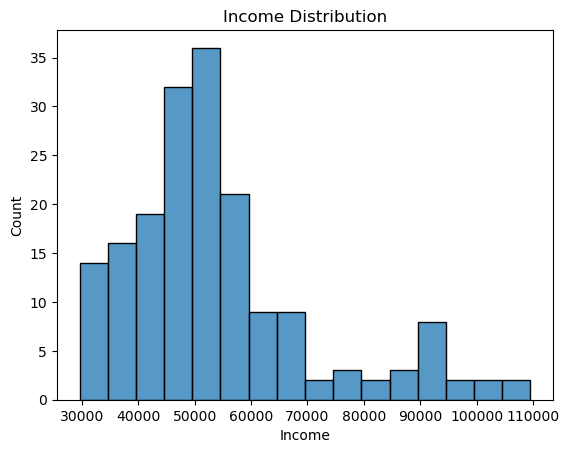

In [94]:
# Create a Histogram for Income using Seaborn
sns.histplot(aerofit_df["Income"], binwidth=5000)
plt.title("Income Distribution")
plt.show()

Majority of the income is between 40,000 dollars and 60,000 dollars

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


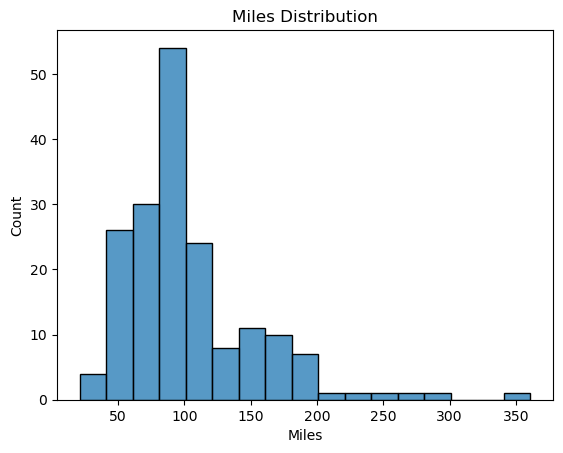

In [98]:
#Create a histogram for average number of miles the customer expects to walk/run each week

sns.histplot(aerofit_df["Miles"], binwidth=20)
plt.title("Miles Distribution")
plt.show()

Majority of the users expect to walk/run between 40 and 120 miles each week. 

### For Categorical Variable

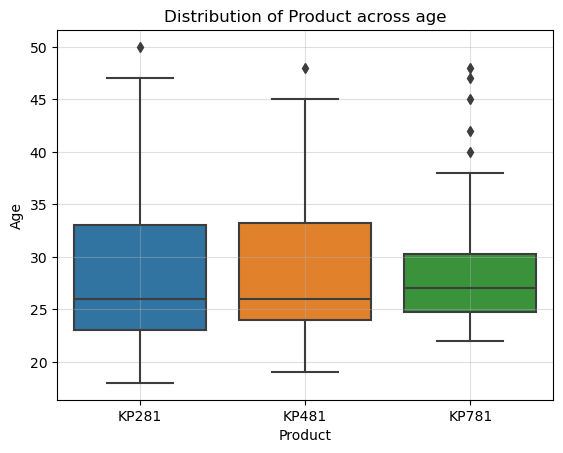

In [131]:
sns.boxplot(x="Product", y="Age", data=aerofit_df)
plt.title("Distribution of Product across age")
plt.grid(alpha=0.4)
plt.show()

As seen before, majority of the users of the treadmill are of the age group between 23-26 and the median age also almost remains the same. Hence, Aerofit must target this customer segment more to maximize their sales.

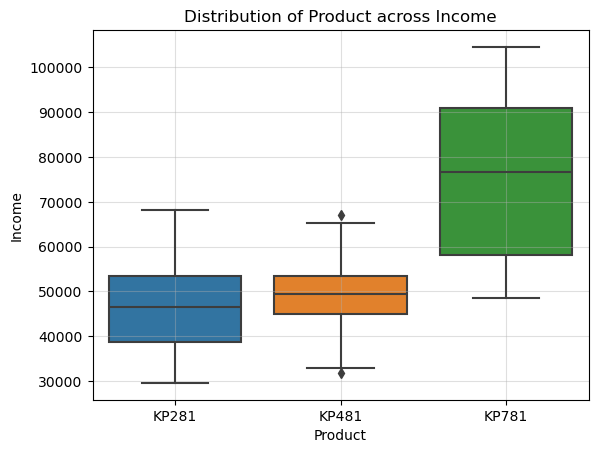

In [130]:
sns.boxplot(data=aerofit_df, x="Product", y="Income")
plt.title("Distribution of Product across Income")
plt.grid(alpha=0.4)
plt.show()

As seen before, majority of the income is between 40,000 dollars and 60,000 dollars. Users of KP281, KP481 and KP781 have a median salary around 46,000, 50,000 and 76,000 dollars respectively. Hence, corresponding treadmill models should be targeted according to the income range of the users.

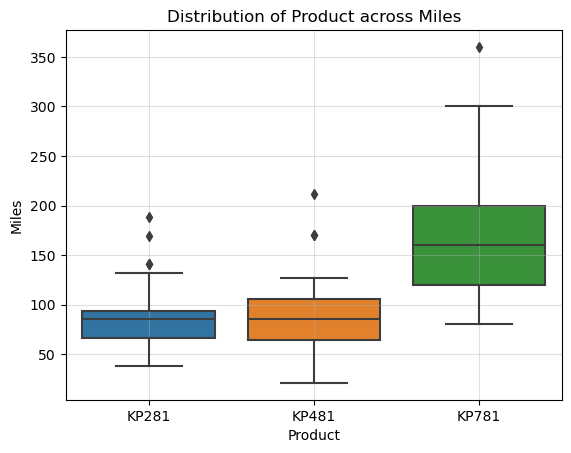

In [132]:
sns.boxplot(data=aerofit_df, x="Product", y="Miles")
plt.title("Distribution of Product across Miles")
plt.grid(alpha=0.4)
plt.show()

As seen before, majority of the users expect to walk/run between 40 and 120 miles each week as the sales of KP281 and KP481 accounts for 77.77% of the sales. It is interesting to see that users of KP781 treadmill users expect to walk/run a significant higher number of miles with a median of around 160 miles every week.

In [166]:
# Create a contingency table to get the counts for each combination of Product and Education
contingency_table = pd.crosstab(aerofit_df['Education'], aerofit_df['Product'])
print("Contingency Table:")
print(contingency_table)

row_totals = contingency_table.sum(axis=1)
grand_total = contingency_table.sum().sum()
marginal_probabilities = row_totals / grand_total
        
print("\nMarginal Probabilities:")
print(marginal_probabilities)
        
# Compute Conditional Probabilities (Cell Values / Row Totals)
conditional_probabilities = contingency_table.div(row_totals, axis=0)
print("\nConditional Probabilities:")
print(conditional_probabilities)

Contingency Table:
Product    KP281  KP481  KP781
Education                     
12             2      1      0
13             3      2      0
14            30     23      2
15             4      1      0
16            39     31     15
18             2      2     19
20             0      0      1
21             0      0      3

Marginal Probabilities:
Education
12    0.016667
13    0.027778
14    0.305556
15    0.027778
16    0.472222
18    0.127778
20    0.005556
21    0.016667
dtype: float64

Conditional Probabilities:
Product       KP281     KP481     KP781
Education                              
12         0.666667  0.333333  0.000000
13         0.600000  0.400000  0.000000
14         0.545455  0.418182  0.036364
15         0.800000  0.200000  0.000000
16         0.458824  0.364706  0.176471
18         0.086957  0.086957  0.826087
20         0.000000  0.000000  1.000000
21         0.000000  0.000000  1.000000


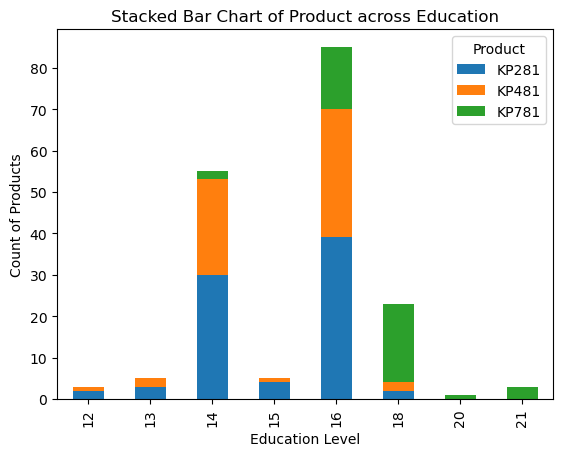

In [165]:
# Plot a stacked bar chart
contingency_table.plot(kind='bar', stacked=True)

# Add title and labels
plt.title("Stacked Bar Chart of Product across Education")
plt.xlabel("Education Level")
plt.ylabel("Count of Products")
plt.legend(title="Product")
plt.show()

Users with an education of less than 16 years prefer KP281 and KP481. On the other hand, users with more than 16 years of education prefer KP781. So, the treadmills should be sold to the corresponding education levels of the users.

In [167]:
# Create a contingency_table to get the counts for each combination of Product and Gender
contingency_table = pd.crosstab(aerofit_df['Gender'], aerofit_df['Product'])
print("Contingency Table:")
print(contingency_table)

row_totals = contingency_table.sum(axis=1)
grand_total = contingency_table.sum().sum()
marginal_probabilities = row_totals / grand_total
        
print("\nMarginal Probabilities:")
print(marginal_probabilities)
        
# Compute Conditional Probabilities (Cell Values / Row Totals)
conditional_probabilities = contingency_table.div(row_totals, axis=0)
print("\nConditional Probabilities:")
print(conditional_probabilities)


Contingency Table:
Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33

Marginal Probabilities:
Gender
Female    0.422222
Male      0.577778
dtype: float64

Conditional Probabilities:
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308


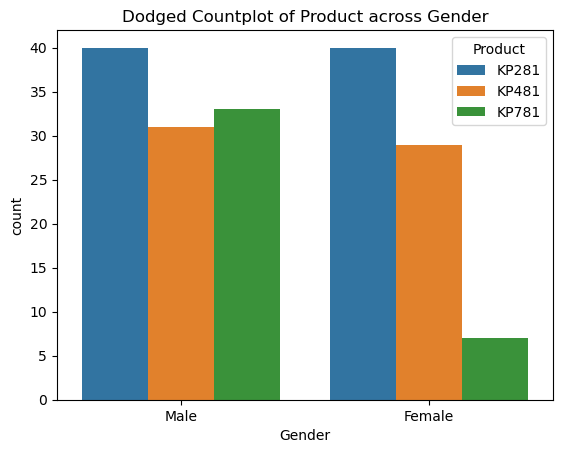

In [168]:
sns.countplot(x='Gender',hue='Product',data=aerofit_df)
plt.title("Dodged Countplot of Product across Gender")
plt.show()

While the buying of KP281 and KP481 remains almost same for both the genders, it is seen that the high end treadmill KP781 is majorly purchased by male users. 

In [169]:
# Create a contingency_table to get the counts for each combination of Product and MaritalStatus
contingency_table = pd.crosstab(aerofit_df['MaritalStatus'], aerofit_df['Product'])
print("Contingency Table:")
print(contingency_table)

row_totals = contingency_table.sum(axis=1)
grand_total = contingency_table.sum().sum()
marginal_probabilities = row_totals / grand_total
        
print("\nMarginal Probabilities:")
print(marginal_probabilities)
        
# Compute Conditional Probabilities (Cell Values / Row Totals)
conditional_probabilities = contingency_table.div(row_totals, axis=0)
print("\nConditional Probabilities:")
print(conditional_probabilities)


Contingency Table:
Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17

Marginal Probabilities:
MaritalStatus
Partnered    0.594444
Single       0.405556
dtype: float64

Conditional Probabilities:
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877


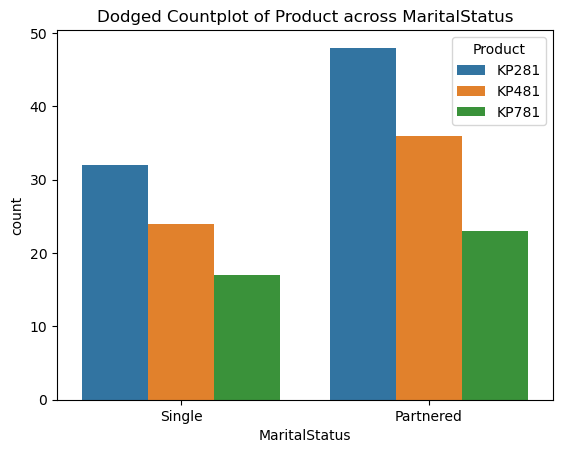

In [170]:
sns.countplot(x='MaritalStatus',hue='Product',data=aerofit_df)
plt.title("Dodged Countplot of Product across MaritalStatus")
plt.show()

In [171]:
# Create a contingency_table to get the counts for each combination of Product and Fitness
contingency_table = pd.crosstab(aerofit_df['Fitness'], aerofit_df['Product'])
print("Contingency Table:")
print(contingency_table)

row_totals = contingency_table.sum(axis=1)
grand_total = contingency_table.sum().sum()
marginal_probabilities = row_totals / grand_total
        
print("\nMarginal Probabilities:")
print(marginal_probabilities)
        
# Compute Conditional Probabilities (Cell Values / Row Totals)
conditional_probabilities = contingency_table.div(row_totals, axis=0)
print("\nConditional Probabilities:")
print(conditional_probabilities)

Contingency Table:
Product  KP281  KP481  KP781
Fitness                     
1            1      1      0
2           14     12      0
3           54     39      4
4            9      8      7
5            2      0     29

Marginal Probabilities:
Fitness
1    0.011111
2    0.144444
3    0.538889
4    0.133333
5    0.172222
dtype: float64

Conditional Probabilities:
Product     KP281     KP481     KP781
Fitness                              
1        0.500000  0.500000  0.000000
2        0.538462  0.461538  0.000000
3        0.556701  0.402062  0.041237
4        0.375000  0.333333  0.291667
5        0.064516  0.000000  0.935484


While no specific trend is observed for MaritalStatus, it can be seen that users with partners are more likely to purchase a treadmill when compared to users who are single.

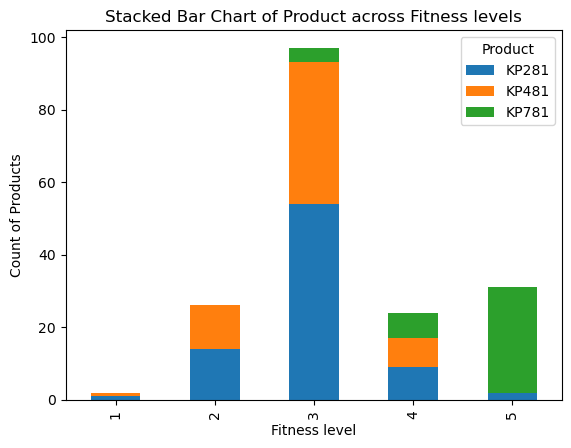

In [172]:
# Plot a stacked bar chart
contingency_table.plot(kind='bar', stacked=True)

# Add title and labels
plt.title("Stacked Bar Chart of Product across Fitness levels")
plt.xlabel("Fitness level")
plt.ylabel("Count of Products")
plt.legend(title="Product")
plt.show()

Majority of the users lie in the range of moderate fitness levels of 3 and buy KP281 and KP481. Users with fitness levels less than 3 buy KP281 and KP481 but not KP781. Users with fitness levels of 4 buy KP281, KP481 and KP781 equally. More than 90% of the users with a fitness level of 5 use KP781. 

In [173]:
# Create a contingency_table to get the counts for each combination of Product and Usage
contingency_table = pd.crosstab(aerofit_df['Usage'], aerofit_df['Product'])
print("Contingency Table:")
print(contingency_table)

row_totals = contingency_table.sum(axis=1)
grand_total = contingency_table.sum().sum()
marginal_probabilities = row_totals / grand_total
        
print("\nMarginal Probabilities:")
print(marginal_probabilities)
        
# Compute Conditional Probabilities (Cell Values / Row Totals)
conditional_probabilities = contingency_table.div(row_totals, axis=0)
print("\nConditional Probabilities:")
print(conditional_probabilities)

Contingency Table:
Product  KP281  KP481  KP781
Usage                       
2           19     14      0
3           37     31      1
4           22     12     18
5            2      3     12
6            0      0      7
7            0      0      2

Marginal Probabilities:
Usage
2    0.183333
3    0.383333
4    0.288889
5    0.094444
6    0.038889
7    0.011111
dtype: float64

Conditional Probabilities:
Product     KP281     KP481     KP781
Usage                                
2        0.575758  0.424242  0.000000
3        0.536232  0.449275  0.014493
4        0.423077  0.230769  0.346154
5        0.117647  0.176471  0.705882
6        0.000000  0.000000  1.000000
7        0.000000  0.000000  1.000000


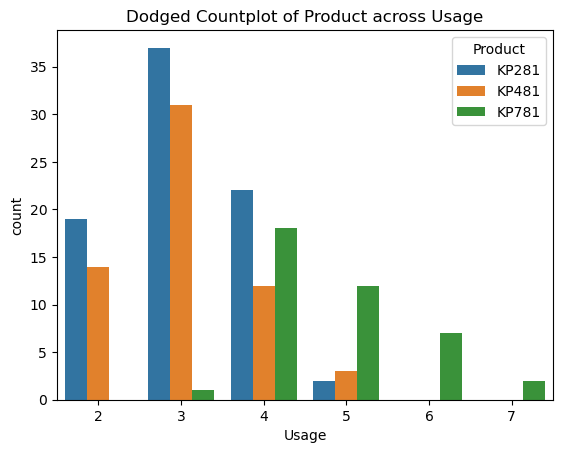

In [174]:
sns.countplot(x='Usage',hue='Product',data=aerofit_df)
plt.title("Dodged Countplot of Product across Usage")
plt.show() 

- Users of KP281 and KP481 use the product less than 5 days a week with majority of the users of KP281 and KP471 using it for 2,3 and 4 times a week. 
- Users of KP781 use the product greater than 3 times a week with majority of the users of KP781 using the treadmill for 4 and 5 times a week.

### For Correlation

Since, it is difficult to draw any meaningful insights from Pairplots, correlation matrix and heatmaps are used for the correlation studies. There is some issue with the display of annotations in the heatmap in Jupyter notebook and I could not fix it. Hence, I used correlation matrix for the analysis.

In [152]:
aerofit_df.corr(numeric_only=True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


- There is highest positive correlation of 78.57% between Miles and Fitness level followed by a correlation of 75.91% betweeen Miles and Usage. This shows that users with a higher fitness level expect to walk/run more number of miles per week and also use the treadmill more frequently in a week.
- Also, there is a positive correlation of 62.58% between Income level and Education, 54.35% between Income level and Miles, a 53.5% correlation between Income and Fitness level and a 51.95% of correlation between Income and Usage. This shows that users with a higher income tend to be more educated, walk/run more number of miles per week and use the treadmill more frequently in a week and hence also have a higher fitness level.

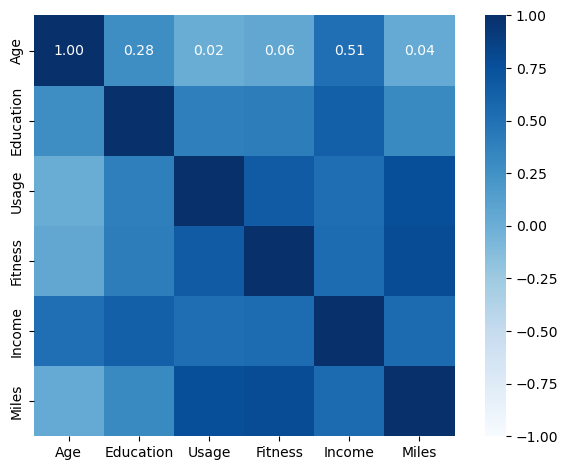

In [151]:
sns.heatmap(aerofit_df.corr(numeric_only=True), cmap="Blues", annot=True, annot_kws={"size": 10}, fmt=".2f", vmin=-1, vmax=1, square=True)
plt.tight_layout() 
plt.show()

## 4. Missing Value & Outlier Detection

From aerofit_df.isna().sum() and aerofit_df.describe() in Chapter 1, it is concluded that the dataframe does not have any missing values and no outliers as the median of every feature was close to the mean value. Additionally, from the box plots created at Chapter 3 for visual analysis, enough stress has been given to outlier detection.

## 5. Business Insights based on Non-Graphical and Visual Analysis

The necessary comments with business insights have been included after every cell of the Non-graphical and visual analysis. Hence, no seperate Business insights is provided here.

## 6. Business Recommendations

Here are some simple, actionable recommendations for Aerofit based on the insights:

- **Target the 23-26 Age Group**: Since the majority of users fall within this age range, focus marketing efforts on this demographic by creating ads and promotional content tailored to younger adults, highlighting the benefits of fitness and health maintenance.

- **Offer Price-Tiered Treadmills**: Align treadmill models with income levels. For example, market KP281 to users with annual incomes of 40,000 to 46,000 dollars, KP481 to users around 50,000 dollars, and KP781 to higher-income individuals (76,000+ dollars). This income-based segmentation can optimize sales by catering to customer affordability.

- **Emphasize Mid-Level Fitness for KP281 and KP481**: Most users rate themselves at a moderate fitness level of 3. Promote KP281 and KP481 as ideal for users aiming for regular, moderate exercise routines (3-4 times a week).

- **Promote KP781 for High-Mileage Users**: Users who plan to run or walk 160 miles per week prefer KP781. Highlight its advanced features and durability in marketing to fitness enthusiasts who engage in high-mileage routines.

- **Leverage Male KP781 Buyers**: Since the high-end KP781 is more popular among male users, tailor advertisements for KP781 with male-centric messaging, showcasing its suitability for intense workouts and higher usage frequency.

- **Educate Based Marketing**: Users with more than 16 years of education prefer KP781. Use educational content, such as detailed product brochures or blog posts, to appeal to this group. Highlight how the advanced features of KP781 support high fitness goals.

- **Encourage Partnered Users**: Since users with partners are more likely to purchase treadmills, develop promotions offering discounts or bundle deals for couples or families to boost sales.

- **Focus on Usage Frequency**: Since 85% of users plan to use treadmills 4 times or less per week, emphasize that KP281 and KP481 are designed for light-to-moderate regular use, whereas KP781 is better suited for more frequent, intensive use.

- **Fitness Correlation Promotions**: Promote KP781 as ideal for high fitness level users (fitness level 5), who also plan to use it for more miles and more frequently per week. Tailor fitness challenge programs that cater to high-end treadmill users.

- **Highlight Income and Fitness Links**: Show how regular treadmill usage, like KP781, is linked with improved fitness levels and healthier lifestyles, using data to demonstrate that higher incomes and better education correlate with greater fitness outcomes. This appeals to aspirational buyers.
